# Create demo datasets

In this notebook, a few demo datasets are created. In general, these are simple datasets that should be solvable within a few seconds, making them perfect for testing and debugging. Additionally, they also serve as a sanity check to see if the algorithm is working as expected, due to their simplicity. However, they may contain some tricky aspects as well. 

In [1]:
import numpy as np
import pandas as pd
from dtaianomaly.data_management import DataManager
from dtaianomaly.visualization import plot_data

The datasets will include Gaussian noise. So for reproducibility, we set the random seed.

In [2]:
np.random.seed(42)

We can already load a data manager. This makes our live easier for loading and saving the datasets. Additionally, we remove all existing demo datasets, because otherwise an exception will be raised stating that the datasets already exist. And in any case, the datasets are recreated below anyway.

In [3]:
data_manager = DataManager('../data')
indices = data_manager.select({'collection_name': 'Demo'}).get()
for index in indices:
    data_manager.remove_dataset(index)

## Demo datast 1

The first dataset will be a simple sine wave, including some Gaussian noise, in which we injected a simple anomaly. The anomaly is a small decrease in the amplitude of the sine wave, located at a valley of the sine. This is done to make no abrupt changes in the data, to not make it *too* easy for the anomaly detector. Nevertheless, any anomaly detector should be able to find this anomaly.  

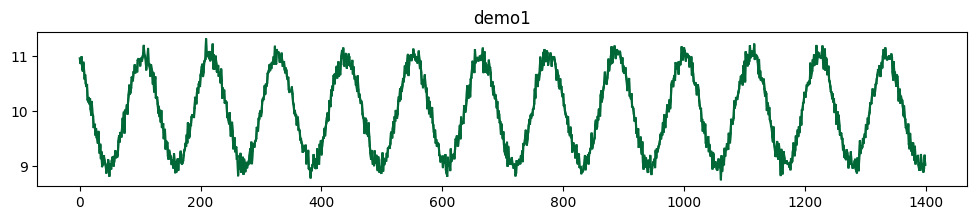

In [4]:
trend_data = np.sin(np.linspace(0, 25 * np.pi, 1400) + 2)
trend_data += np.random.normal(10, 0.1, trend_data.shape)
trend_data_df = pd.DataFrame({'demo1': trend_data, 'is_anomaly': np.zeros_like(trend_data)})
trend_data_df.index.name = 'timestamp'
fig = plot_data(trend_data_df, show_ground_truth='overlay')
fig.set_size_inches(12, 2)

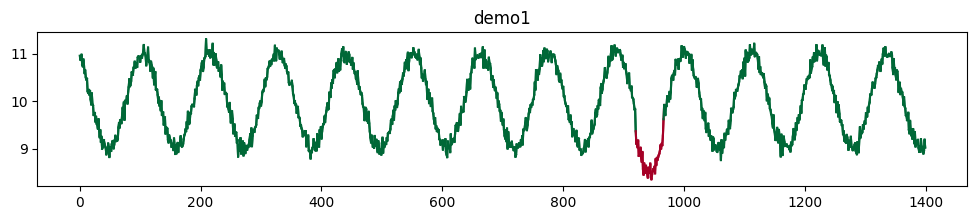

In [5]:
start_anomaly = 920
end_anomaly = 965
trend_data[start_anomaly:end_anomaly] -= 0.5
trend_data_df.loc[start_anomaly:end_anomaly, 'demo1'] -= 0.5
trend_data_df.loc[start_anomaly:end_anomaly, 'is_anomaly'] = 1
fig = plot_data(trend_data_df, show_ground_truth='overlay')
fig.set_size_inches(12, 2)

In [6]:
data_manager.add_dataset(
    collection_name='Demo',
    dataset_name='Demo1',
    test_data=trend_data_df,
    test_path='demo/demo1.csv',
    dataset_type='synthetic',
    train_type='unsupervised',
    train_is_normal=False,
    trend='no trend',
    stationarity=None,
    period_size=100  # Approximately based on the figure
)

## Demo dataset 2

To make the anomaly a bit more difficult to find, we concatenate a second sine wave, with a different period. Here, we manually tuned the parameters slightly, to make sure that there is no abrupt change between the two sine waves, but there is a relatively gradual transition. Additionally, we have lowered the second sine wave slightly in comparison to the first sine wave. Because of this, valleys of the second sine wave are approximately equal to the anomalous valley in the first sine wave. This obscures the anomaly a bit more, making it more difficult to find.

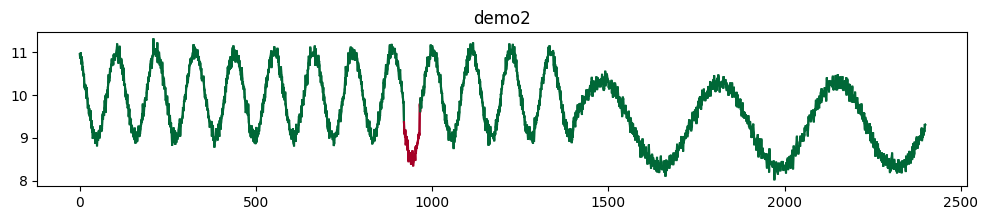

In [7]:
extra_part = np.sin(np.linspace(0, 6 * np.pi, 1000))
extra_part += np.random.normal(9.3, 0.1, extra_part.shape)
trend_data_df_2 = pd.DataFrame({
    'demo2': np.concatenate([trend_data, extra_part]),
    'is_anomaly': np.concatenate([trend_data_df['is_anomaly'].values, np.zeros_like(extra_part)])
})
trend_data_df_2.index.name = 'timestamp'
fig = plot_data(trend_data_df_2, show_ground_truth='overlay')
fig.set_size_inches(12, 2)

In [8]:
data_manager.add_dataset(
    collection_name='Demo',
    dataset_name='Demo2',
    test_data=trend_data_df_2,
    test_path='demo/demo2.csv',
    dataset_type='synthetic',
    train_type='unsupervised',
    train_is_normal=False,
    trend='no trend',
    stationarity=None,
    period_size=100  # Smallest period
)

## Demo dataset 3

For the third time series, we include an anomaly in the second sine wave as well. An anomaly detector should be able to find both anomalies, which are similar (both a deeper valley), but not exactly the same. This might make it even more difficult to detect the anomalies. 

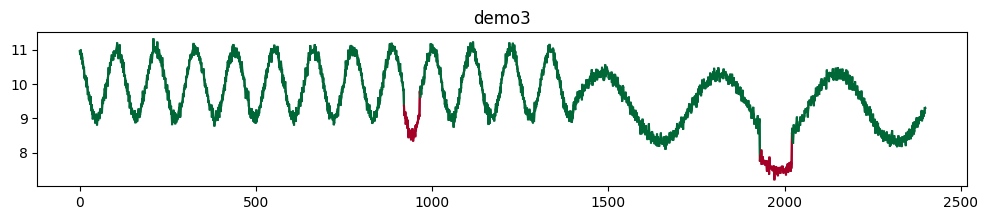

In [9]:
start_new_anomaly, end_new_anomaly = 1930, 2020
trend_data_df_3 = trend_data_df_2.copy()
trend_data_df_3.rename(columns={'demo2': 'demo3'}, inplace=True)
trend_data_df_3.loc[start_new_anomaly:end_new_anomaly, 'demo3'] *= 0.9
trend_data_df_3.loc[start_new_anomaly:end_new_anomaly, 'is_anomaly'] = 1
fig = plot_data(trend_data_df_3, show_ground_truth='overlay')
fig.set_size_inches(12, 2)

In [10]:
data_manager.add_dataset(
    collection_name='Demo',
    dataset_name='Demo3',
    test_data=trend_data_df_3,
    test_path='demo/demo3.csv',
    dataset_type='synthetic',
    train_type='unsupervised',
    train_is_normal=False,
    trend='no trend',
    stationarity=None,
    period_size=100  # Smallest period
)

## Demo dataset 4

The fourth time series is constructed similarly as the third one. We start from the second time series (which consists of two sines with different period, and the first sine has an anomaly). for the third time series we included an anomaly as a valley in the second sine wave. This is similar as the anomaly in the first sine. To emphasize diversity of anomalies, we construct this dataset, which has an anomaly as a peak in the second sine wave. While the idea is similar, the anomalies are more different than in the dataset 3. 

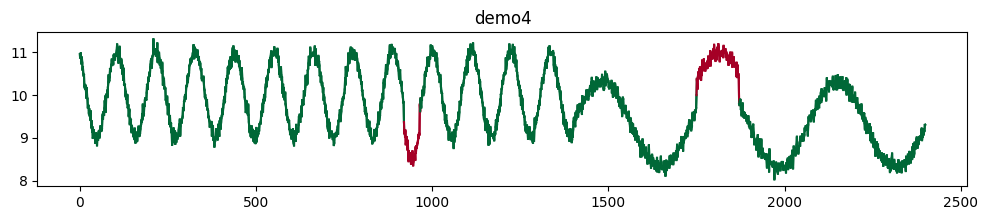

In [11]:
start_new_anomaly, end_new_anomaly = 1750, 1870
trend_data_df_4 = trend_data_df_2.copy()
trend_data_df_4.rename(columns={'demo2': 'demo4'}, inplace=True)
trend_data_df_4.loc[start_new_anomaly:end_new_anomaly, 'demo4'] *= 1.07
trend_data_df_4.loc[start_new_anomaly:end_new_anomaly, 'is_anomaly'] = 1
fig = plot_data(trend_data_df_4, show_ground_truth='overlay')
fig.set_size_inches(12, 2)

In [12]:
data_manager.add_dataset(
    collection_name='Demo',
    dataset_name='Demo4',
    test_data=trend_data_df_4,
    test_path='demo/demo4.csv',
    dataset_type='synthetic',
    train_type='unsupervised',
    train_is_normal=False,
    trend='no trend',
    stationarity=None,
    period_size=100  # Smallest period
)

## Check reading the demo time series

This is a final check, to make sure that the datasets can be properly read, as well as comparison of the different demo time series. 

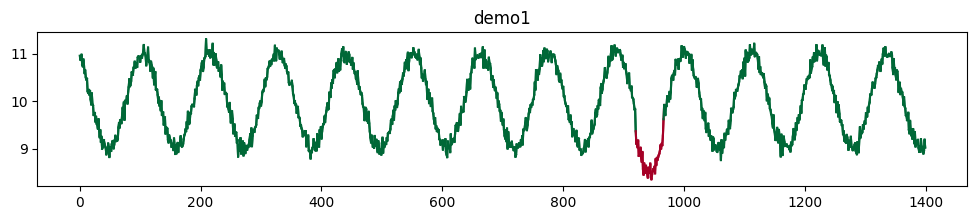

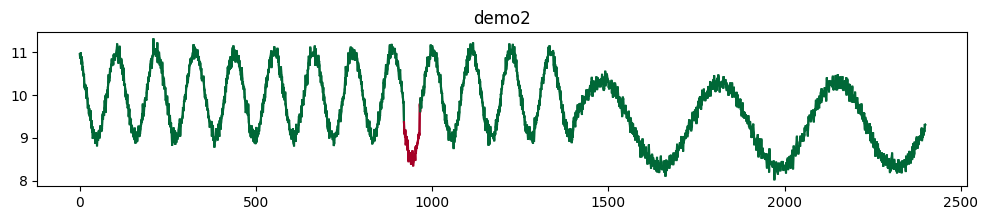

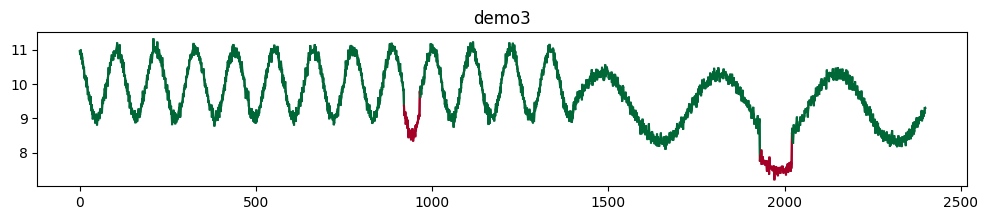

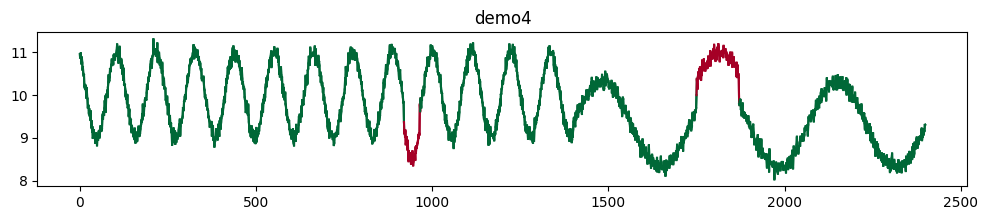

In [13]:
data_manager.clear()
data_manager.select({'collection_name': 'Demo'})
for dataset_index in data_manager.get():
    fig = plot_data(data_manager.load(dataset_index), show_ground_truth='overlay')
    fig.set_size_inches(12, 2)